In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl

## 1.1 preprocessing the data

In [228]:
df1 = pd.read_csv('/Users/chriz_yu/Documents/MSU/CSE 801B/Project/student/student-por.csv',sep=';')
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## 1.2 distinct level for each features

In [229]:
df1.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

## 1.3 create dummy variables for categorical variables

In [230]:

df2 = pd.get_dummies(df1, columns=['school', 
'sex', 'address', 'famsize','Pstatus',
'Medu','Fedu','Mjob','Fjob','reason',
'guardian','traveltime','studytime',
'failures','schoolsup','famsup','paid',
'activities','nursery','higher','internet',
'romantic','famrel','freetime','goout','Dalc','Walc','health'], drop_first= True)
df2

,age,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,18,4,0,11,11,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17,2,9,11,11,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,15,6,12,13,12,0,0,1,1,1,...,0,0,0,1,0,0,0,1,0,0
3,15,0,14,14,14,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,16,0,11,13,13,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,4,10,11,10,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
645,18,4,15,15,16,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
646,18,6,11,12,9,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
647,17,6,10,10,10,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0


## 1.4 put predictor into two level: pass or fail

In [231]:
df2['G3'] = [1 if x >= 10  else 0 for x in df2['G3']]

## 2.1 Modeling

In [248]:
from sklearn.model_selection import train_test_split
x = df2.drop(columns=['G3'])
y = df2['G3']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3
,random_state=0)

## 2.2 Using RandomForest Classifier

In [233]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier()

## 2.3 Cross Valid RandomForest

### 10-fold 

In [234]:
# 10-fold CV RF with accuracy scoring
from sklearn.model_selection import cross_val_score
RFC = cross_val_score(model_RFC,x,y,cv=10, scoring= 'accuracy')
print(f'Mean accuracy: {RFC.mean().round(3)}\
\nSD of accuracy: {RFC.std().round(3)}')

Mean accuracy: 0.921
SD of accuracy: 0.031


In [235]:
# 10-fold CV RF with f1 scoring
from sklearn import metrics
RFC2 = cross_val_score(model_RFC,x,y,cv=10, scoring= 'f1')
print(f'Mean f1-score: {RFC2.mean().round(3)}\
\nSD of f1-score: {RFC2.std().round(3)}')

Mean f1-score: 0.954
SD of f1-score: 0.017


### 5-fold

In [236]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size= 0.3, random_state=0)
RFC3 = cross_val_score(model_RFC,x,y,cv=cv, scoring= 'accuracy')
print(f'Mean accuracy: {RFC3.mean().round(3)}\
\nSD of  accuracy: {RFC3.std().round(3)}')

Mean accuracy: 0.916
SD of  accuracy: 0.008


### Regular RFC

In [237]:
model_RFC.fit(x_train,y_train)
y_pred_RFC = model_RFC.predict(x_test)

### Result and Performance Metrics

In [238]:
from sklearn.metrics import mean_absolute_error, 
mean_squared_error, precision_recall_fscore_support

PRFS = precision_recall_fscore_support(y_test,y_pred_RFC, average='binary')
print(f"accuracy: {model_RFC.score(x_test,y_test):.3f},\
\nprecision: {PRFS[0]:.3f},\nrecall: {PRFS[1]:.3f},\nfscore: {PRFS[2]:.3f}")

accuracy: 0.933,
precision: 0.942,
recall: 0.982,
fscore: 0.961


## 2.4 Feature Importance

In [239]:
# create FI dataframe and sort it
FIdf = pd.DataFrame(columns=['FI'],index=model_RFC.feature_names_in_)
FIdf['FI'] = model_RFC.feature_importances_
FIdf = FIdf.sort_values(by=['FI'], ascending=False)

### FI Plot

<AxesSubplot: xlabel='FI'>

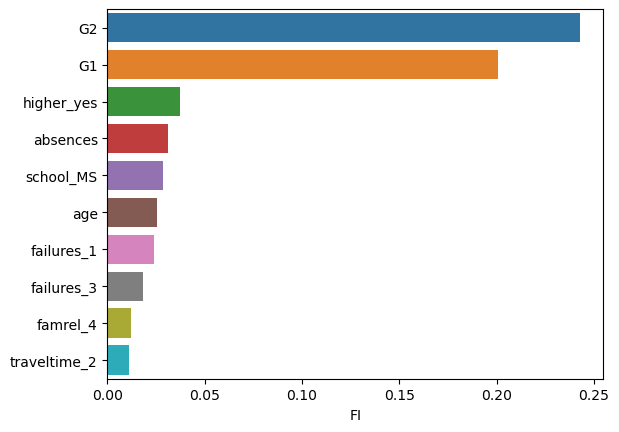

In [240]:
sns.barplot(data = FIdf, x =FIdf['FI'][0:10], y=FIdf.index[0:10])

In [241]:
# G1 - first period grade (numeric: from 0 to 20)
# G2 - second period grade (numeric: from 0 to 20

### Droping G1 and G2 grade to have a better understanding of FI in the dataset

In [242]:
x = df2.drop(columns=['G3','G2','G1'])
y = df2['G3']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

###  5 and 10 fold CV

In [243]:
model_RFC = RandomForestClassifier()
RFC = cross_val_score(model_RFC,x,y,cv=10, scoring= 'accuracy')
print(f'Mean accuracy: {RFC.mean().round(3)}\
\nSD of accuracy: {RFC.std().round(3)}')

Mean accuracy: 0.84
SD of accuracy: 0.023


In [244]:
cv = ShuffleSplit(n_splits=5, test_size= 0.3, random_state=0)
RFC3 = cross_val_score(model_RFC,x,y,cv=cv, scoring= 'accuracy')
print(f'Mean accuracy: {RFC3.mean().round(3)}\
\nSD of  accuracy: {RFC3.std().round(3)}')

Mean accuracy: 0.846
SD of  accuracy: 0.022


In [245]:
model_RFC.fit(x_train,y_train)
y_pred_RFC = model_RFC.predict(x_test)

PRFS = precision_recall_fscore_support(y_test,y_pred_RFC, average='binary')
print(f"accuracy: {model_RFC.score(x_test,y_test):.3f}\
,\nprecision: {PRFS[0]:.3f},\nrecall: {PRFS[1]:.3f},\nfscore: {PRFS[2]:.3f}")

accuracy: 0.856,
precision: 0.859,
recall: 0.994,
fscore: 0.921


### FI Plot with out G1 and G2 predictor

<AxesSubplot: xlabel='FI'>

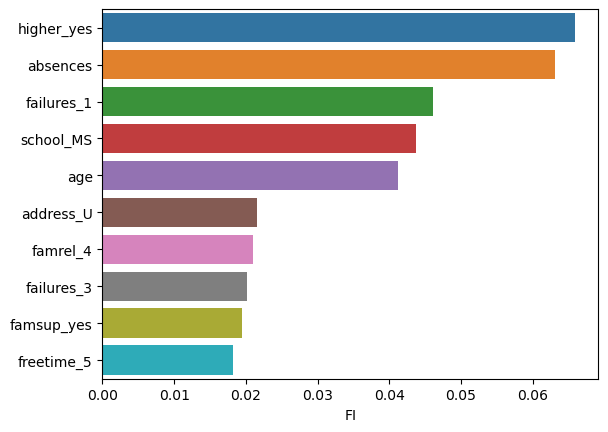

In [246]:
FIdf = pd.DataFrame(columns=['FI'],index=model_RFC.feature_names_in_)
FIdf['FI'] = model_RFC.feature_importances_
FIdf = FIdf.sort_values(by=['FI'], ascending=False)
sns.barplot(data = FIdf, x =FIdf['FI'][0:10], y=FIdf.index[0:10])

In [247]:
# higher - wants to take higher education (binary: yes or no)
# absences - number of school absences (numeric: from 0 to 93)
# school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
# failures - number of past class failures (numeric: n if 1<=n<3, else 4)
# age - student's age (numeric: from 15 to 22)
